In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from pandas.plotting import scatter_matrix

In [2]:
file_path = '/Users/arianamaisonet/trump_tweets.csv'
df = pd.read_csv(file_path, index_col=0)
#dropping ids incase they reveal year
df = df.drop(['text'],axis=1)

X = df.drop(['pre_Musk'],axis=1)
y = df['pre_Musk']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.2)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.961


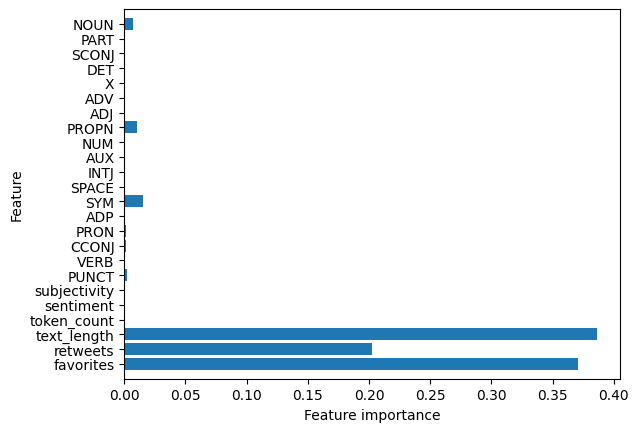

In [5]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(gbrt)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gbrt.predict(X_test),
                            target_names=["pre-Musk", "post-Musk"]))

              precision    recall  f1-score   support

    pre-Musk       0.89      0.88      0.88      1821
   post-Musk       0.98      0.98      0.98      9052

    accuracy                           0.96     10873
   macro avg       0.93      0.93      0.93     10873
weighted avg       0.96      0.96      0.96     10873



In [11]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "n_estimators":[10, 50, 100, 200]
    }

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

kf = KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(GradientBoostingClassifier(), parameters,cv=kf)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=5)
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

recall = cross_val_score(gbrt, X, y, cv=kf, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(gbrt, X, y, cv=kf, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(gbrt, X, y, cv=kf, scoring='f1')
print('F1', np.mean(f1), f1)

Recall 0.9764855245600756 [0.98005042 0.97594768 0.97346894 0.97851368 0.9744469 ]
Precision 0.9725560026254781 [0.97438971 0.97260577 0.9731462  0.97312479 0.96951354]
F1 0.9745158055782464 [0.97721187 0.97427386 0.97330754 0.9758118  0.97197396]


In [15]:
grid.fit(X_train, y_train)
print(classification_report(y_test, grid.predict(X_test),
                            target_names=["2019-2020", "2023-2024"]))

              precision    recall  f1-score   support

   2019-2020       0.90      0.90      0.90      1821
   2023-2024       0.98      0.98      0.98      9052

    accuracy                           0.97     10873
   macro avg       0.94      0.94      0.94     10873
weighted avg       0.97      0.97      0.97     10873



In [16]:
print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.967


In [ ]:
recall = cross_val_score(grid, X, y, cv=kf, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(grid, X, y, cv=kf, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(grid, X, y, cv=kf, scoring='f1')
print('F1', np.mean(f1), f1)

In [ ]:
parameters_knn = {"n_neighbors" : [3, 5, 7, 9],
                "weights": ['uniform', 'distance'],
                "p" : [1, 1.5, 2]
                }

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# k = 4
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test),
                            target_names=["pre-Musk", "post-Musk"]))

In [ ]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

In [ ]:
grid_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn,cv=kf)
grid_knn.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid_knn.cv_results_).iloc[:,4:].sort_values('rank_test_score')

In [ ]:
recall = cross_val_score(grid_knn, X, y, cv=kf, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(grid_knn, X, y, cv=kf, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(grid_knn, X, y, cv=kf, scoring='f1')
print('F1', np.mean(f1), f1)

In [ ]:
grid_knn.fit(X_train, y_train)
print(classification_report(y_test, grid_knn.predict(X_test),
                            target_names=["2019-2020", "2023-2024"]))